**Table of contents**<a id='toc0_'></a>    
- [Fonctions](#toc1_)    
  - [Test des fonctions](#toc1_1_)    
- [Nettoyage](#toc2_)    
  - [Suppression des colonnes ayant trop de données manquantes](#toc2_1_)    
  - [Suppression des lignes contenant trop de valeurs manquantes](#toc2_2_)    
  - [Suppression des variables de consommation énergétique](#toc2_3_)    
  - [One hot encoder](#toc2_4_)    
  - [Exploration des variables Y](#toc2_5_)    
    - [SiteEnergyUseWN](#toc2_5_1_)    
      - [Transformation en log](#toc2_5_1_1_)    
    - [TotalGHGEmissions](#toc2_5_2_)    
    - [Transformation en log](#toc2_5_3_)    
  - [Histogramme des valeurs numériques](#toc2_6_)    
  - [Imputation des valeurs manquantes](#toc2_7_)    
  - [Nouvelles variables](#toc2_8_)    
- [Exploration des données](#toc3_)    
  - [Corrélation 2 à 2](#toc3_1_)    
- [Analyses](#toc4_)    
  - [pipepline](#toc4_1_)    
  - [Modèles](#toc4_2_)    
  - [Y1](#toc4_3_)    
    - [Sans log](#toc4_3_1_)    
    - [Avec log](#toc4_3_2_)    
    - [Visualisation du modèle](#toc4_3_3_)    
    - [Avec log sans Energy score](#toc4_3_4_)    
    - [Sauvegarde due modèle](#toc4_3_5_)    
  - [Y2](#toc4_4_)    
    - [Sans log](#toc4_4_1_)    
    - [Avec log](#toc4_4_2_)    
    - [Avec log sans Energy score](#toc4_4_3_)    
    - [Visualisation du modèle](#toc4_4_4_)    
    - [Comparaison avec un modèle de base](#toc4_4_5_)    
    - [Sauvegarde du modèle](#toc4_4_6_)    
- [Plot non disponible dans la fonction](#toc5_)    
- [Fonction pour le réutiliser le modèle](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [34]:
df = pd.read_csv("data/data.csv",header = 0)
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [35]:
df.shape

(3376, 46)

In [36]:
df.describe(include='all')

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
count     3376.000000    3376.0            3376                  3376   
unique            NaN       NaN               8                    24   
top               NaN       NaN  NonResidential  Low-Rise Multifamily   
freq              NaN       NaN            1460                   987   
mean     21208.991114    2016.0             NaN                   NaN   
std      12223.757015       0.0             NaN                   NaN   
min          1.000000    2016.0             NaN                   NaN   
25%      19990.750000    2016.0             NaN                   NaN   
50%      23112.000000    2016.0             NaN                   NaN   
75%      25994.250000    2016.0             NaN                   NaN   
max      50226.000000    2016.0             NaN                   NaN   

           PropertyName            Address     City State       ZipCode  \
count              3376               3376     3376  3376   3360.000000   
unique             3362               3354        1     1           NaN   
top     Northgate Plaza  2600 SW Barton St  Seattle    WA           NaN   
freq                  3                  4     3376  3376           NaN   
mean                NaN                NaN      NaN   NaN  98116.949107   
std                 NaN                NaN      NaN   NaN     18.615205   
min                 NaN                NaN      NaN   NaN  98006.000000   
25%                 NaN                NaN      NaN   NaN  98105.000000   
50%                 NaN                NaN      NaN   NaN  98115.000000   
75%                 NaN                NaN      NaN   NaN  98122.000000   
max                 NaN                NaN      NaN   NaN  98272.000000   

       TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
count                           3376  ...      3.367000e+03      3.367000e+03   
unique                          3268  ...               NaN               NaN   
top                       1625049001  ...               NaN               NaN   
freq                               8  ...               NaN               NaN   
mean                             NaN  ...      1.086639e+06      3.707612e+06   
std                              NaN  ...      4.352478e+06      1.485066e+07   
min                              NaN  ...     -3.382680e+04     -1.154170e+05   
25%                              NaN  ...      1.874229e+05      6.394870e+05   
50%                              NaN  ...      3.451299e+05      1.177583e+06   
75%                              NaN  ...      8.293178e+05      2.829632e+06   
max                              NaN  ...      1.925775e+08      6.570744e+08   

        NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
count         3.367000e+03      3.367000e+03         3376       0.0   
unique                 NaN               NaN            2       NaN   
top                    NaN               NaN        False       NaN   
freq                   NaN               NaN         3263       NaN   
mean          1.368505e+04      1.368505e+06          NaN       NaN   
std           6.709781e+04      6.709781e+06          NaN       NaN   
min           0.000000e+00      0.000000e+00          NaN       NaN   
25%           0.000000e+00      0.000000e+00          NaN       NaN   
50%           3.237538e+03      3.237540e+05          NaN       NaN   
75%           1.189033e+04      1.189034e+06          NaN       NaN   
max           2.979090e+06      2.979090e+08          NaN       NaN   

        ComplianceStatus      Outlier  TotalGHGEmissions  \
count               3376           32        3367.000000   
unique                 4            2                NaN   
top            Compliant  Low outlier                NaN   
freq                3211           23                NaN   
mean                 NaN          NaN         119.723971   
std                  NaN          NaN       

# <a id='toc1_'></a>[Fonctions](#toc0_)

In [37]:
def outliers(df, column, whisker = 1.5, task = "find"):
    """_summary_

    Args:
        df (a padas data frame): _description_
        column (a string): column in which find, remove or round outliers
        whisker (float, optional): _description_. Defaults to 1.5.
        task (str, optional): _description_. Defaults to "find".

    Returns:
        _type_: _description_
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    if "find" in task:
        Fare_outliers = df[(df[column] < Q1 - whisker*IQR) | (df[column] > Q3 + whisker*IQR)]
        return Fare_outliers
    
    if "round" in task:
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
        return df
    
    if "remove" in task:
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,np.nan,np.where(df[column]<lower_whisker,np.nan,df[column]))
        return df
    
    if "mean" in task:
        m = df[column].mean()
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,m,np.where(df[column]<lower_whisker,m,df[column]))
        return df
    
    if "median" in task:
        m = df[column].median()
        lower_whisker = Q1 - (whisker*IQR)
        upper_whisker = Q3 + (whisker*IQR)
        df[column]=np.where(df[column]>upper_whisker,m,np.where(df[column]<lower_whisker,m,df[column]))
        return df

def rangeVector(x):
    return min(x), max(x)

def catFr(df, column):
    if df[column].dtype == "O":
        return df[column].value_counts()/df.shape[0] 
    else:
        print(column + " in df is not an object type" )

def get_dummies_withThershold (df, column, thershold = 0.05):
    if df[column].dtype == "O": # If column is of object type
        series = catFr(df, column) # compute categories frequencies
        series = series[series > thershold].index # find categories frequencies greater than the thershold
        if(len(series) > 0):
            if len(series) == 1:
                print(" In " + column + "Only one categorie")
                return "NA"
            else:  
                df[column] = np.where(~df[column].isin(series.tolist()), "NA",df[column] ) # replace lower categories by NA
                tmp = pd.get_dummies(df[column]) # get dummies
                if "NA" in tmp.columns:
                    tmp.drop("NA", axis = 1, inplace=True) # drop NA
                tmp.columns = column + "_" + tmp.columns
                return tmp # return dummies  
        else:
            print(" In " + column + "all categories are bellow the thershold")
            return "NA"
    else:
        print(column + " in df is not an object type" )
    
def OHEfr_single(df, column, thershold = 0.05):
    """_summary_ 
        Remove a pandas column categories based on a given thershold
    Args:
        df (_type_): a panda data frame
        column (_type_): column name to work on
        thershold (float, optional): _description_. Defaults to 0.05.

    Returns:
        _type_: list of categories that are greateter than the thershold
    """
    if df[column].dtype == "O": # If column is of object type
        tmp = get_dummies_withThershold(df, column, thershold =thershold) # get dummies based on frequencies
        if "NA" in tmp:# If all categories are bellow the thershold return df without the column in question
            df.drop(column, axis = 1, inplace= True)
            return df 
        else:
            tmp = pd.concat([df, tmp], axis= 1) # merge with df
            tmp.drop(column, axis = 1, inplace= True) # drop columns on which dummies based on frequencies have been made
            return tmp
    else:
        return df #  # If column is not of object type return original data frame (to allow iteration on data frame)
        
def OHEfr(df, thershold = 0.05):
    for columns in df:
        df = OHEfr_single(df, columns, thershold= thershold)
    return df

## <a id='toc1_1_'></a>[Test des fonctions](#toc0_)

In [38]:
catFr(df, "BuildingType")

NonResidential          0.432464
Multifamily LR (1-4)    0.301540
Multifamily MR (5-9)    0.171801
Multifamily HR (10+)    0.032583
SPS-District K-12       0.029028
Nonresidential COS      0.025178
Campus                  0.007109
Nonresidential WA       0.000296
Name: BuildingType, dtype: float64

In [39]:
get_dummies_withThershold(df, "BuildingType") # les colonnes sont bien les catégories au fréquences voulues

BuildingType_Multifamily LR (1-4)  BuildingType_Multifamily MR (5-9)  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   
...                                 ...                                ...   
3371                                  0                                  0   
3372                                  0                                  0   
3373                                  0                                  0   
3374                                  0                                  0   
3375                                  0                                  0   

      BuildingType_NonResidential  
0                               1  
1                               1  
2                               1  
3                               1  
4                               1  
...                           ...  
3371                            0  
3372                            0  
3373                            0  
3374                            0  
3375                            0  

[3376 rows x 3 columns]

In [40]:
OHEfr_single(df, "BuildingType") # les dernière colonnes sont bien les anciennes catégories

OSEBuildingID  DataYear PrimaryPropertyType  \
0                 1      2016               Hotel   
1                 2      2016               Hotel   
2                 3      2016               Hotel   
3                 5      2016               Hotel   
4                 8      2016               Hotel   
...             ...       ...                 ...   
3371          50222      2016              Office   
3372          50223      2016               Other   
3373          50224      2016               Other   
3374          50225      2016  Mixed Use Property   
3375          50226      2016  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0     98101.0                    0659000030                    7  ...   
1     98101.0                    0659000220                    7  ...   
2     98101.0                    0659000475                    7  ...   
3     98101.0                    0659000640                    7  ...   
4     98121.0                    0659000970                    7  ...   
...       ...                           ...                  ...  ...   
3371      NaN                    1624049080                    2  ...   
3372      NaN                    3558300000                    2  ...   
3373      NaN                    1794501150                    7  ...   
3374      NaN                    7883603155                    1  ...   
3375      NaN                    7857002030                    2  ...   

     NaturalGas(kBtu)  DefaultData  Comments              ComplianceStatus  \
0        1.276453e+06        False       NaN                     Compliant   
1        5.145082e+06        False       NaN                     Compliant   
2        1.493800e+06        False       NaN                     Compliant   
3        1.811213e+06        False       NaN                     Compliant   
4        8.803998e+06        False       NaN                     Compliant   
...               ...          ...       ...                           ...   
3371     3.254750e+05         True       NaN  Error - Correct Default Data   
3372     5.537300e+05        False       NaN                     Compliant   
3373     3.973739e+06        False       NaN                     Compliant   
3374     3.706010e+05        False       NaN                     Compliant   
3375     7.203420e+05        False       NaN                     Compliant   

      Outlier  TotalGHGEmissions  GHGEmissionsIntensity  \
0         NaN             249.98                   2.83   
1         NaN             295.86                   2.86   
2         NaN            2089.28                   2.19   
3         NaN             286.43                   4.67   
4         NaN             505.01                   2.88   
...       ...                ...                    ...   
3371      NaN              20.94                   1.70   
3372      NaN              32.17                   2.01   
3373      NaN             223.54                  16.99   
3374      NaN              2

# <a id='toc2_'></a>[Nettoyage](#toc0_)

## <a id='toc2_1_'></a>[Suppression des colonnes ayant trop de données manquantes](#toc0_)

In [41]:
Nnan = df.isna().sum()/df.shape[0]
Nnan

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.004739
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.002666
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA       

<AxesSubplot: >

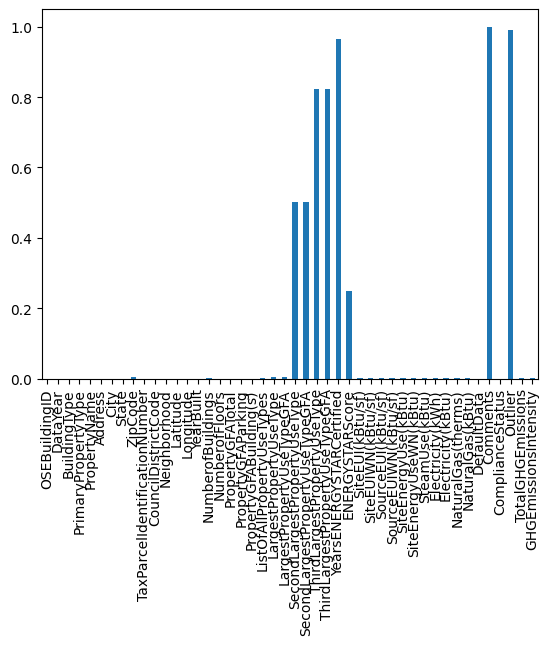

In [42]:
Nnan.plot.bar()

On peut voir que la majorité des colonnes ont des informations complètes. On ne conserve que les colonnes avec un nombre de valeurs manquantes inférieures à la moyenne.

Note, Energy score est enlevé, on le récupèrera plus tard quand on travaillera dessus.

In [43]:
df = df.loc[:,Nnan[Nnan < .99].index]

In [44]:
for columns in df:
    print(str(columns) )
    print( df.loc[:,columns].unique())

OSEBuildingID
[    1     2     3 ... 50224 50225 50226]
DataYear
[2016]
BuildingType
['NonResidential' 'NA' 'Multifamily MR (5-9)' 'Multifamily LR (1-4)']
PrimaryPropertyType
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']
PropertyName
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
Address
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
City
['Seattle']
State
['WA']
ZipCode
[98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109.

In [45]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions',

Pas de duplicata dans les ID des bâtiments

In [46]:
df.OSEBuildingID.duplicated().any()

False

Quelques petits problèmes :

    1. l'année est identique pour tout le monde donc on l'enlève.
    2. PropertyName ne sert à rien on l'enlève.
    3. Address ne sert à rien puisque l'on a les coordonnées géographiques, on l'enlève.
    4. City est identique pour tout le monde donc on l'enlève.
    5. State est identique pour tout le monde donc on l'enlève.
    6. ZipCode n'est pas intéréssant, on l'enlève.
    7. TaxParcelIdentificationNumber n'est pas intéréssant, on l'enlève.
    8. CouncilDistrictCode n’est pas intéréssant, on l'enlève.
    9. Neighborhood n'est pas intéréssant, on l'enlève.
    10.  NumberofBuildings ne peut avoir de zéros.
    11. YearsENERGYSTARCertified sont complètement faussés


In [47]:
df.drop(["OSEBuildingID",
        'CouncilDistrictCode',
         "DataYear",
         "PropertyName",
         'State',
         'TaxParcelIdentificationNumber',         
         'Address',
         'YearsENERGYSTARCertified',
         'ZipCode'], inplace = True, axis = 1)
df['NumberofBuildings'] = np.where(df['NumberofBuildings'] == 0, 1, df['NumberofBuildings'] )

## <a id='toc2_2_'></a>[Suppression des lignes contenant trop de valeurs manquantes](#toc0_)

c:\Users\SSosa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

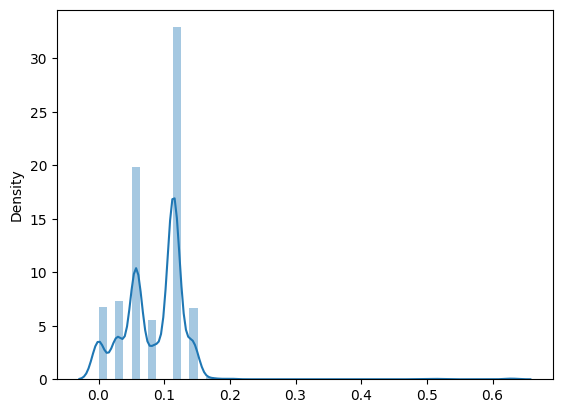

In [48]:
nan = df.isna().sum(axis = 1)/df.shape[1]
nan
sn.distplot(nan)

In [49]:
df = df.filter(items = nan[nan < 0.2].index, axis = 0)

## <a id='toc2_3_'></a>[Suppression des variables de consommation énergétique](#toc0_)

In [50]:
df.drop(['Electricity(kWh)', "NaturalGas(therms)", "SiteEUI(kBtu/sf)",	"SiteEUIWN(kBtu/sf)",	"SourceEUI(kBtu/sf)", "GHGEmissionsIntensity",	"SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "NaturalGas(kBtu)","Electricity(kBtu)", "SteamUse(kBtu)"], axis = 1, inplace=True) 

## <a id='toc2_4_'></a>[One hot encoder](#toc0_)

In [51]:
categorical_columns = df.select_dtypes(['category','object']).columns
numerical_columns = df.select_dtypes(['int32','float64', "int64"]).columns

In [52]:
len(categorical_columns)

9

In [53]:
for columns in df:
    print(columns)
    print(catFr(df, columns))

BuildingType
NonResidential          0.432947
Multifamily LR (1-4)    0.300030
Multifamily MR (5-9)    0.172465
NA                      0.094558
Name: BuildingType, dtype: float64
PrimaryPropertyType
Low-Rise Multifamily           0.290812
Mid-Rise Multifamily           0.167707
Small- and Mid-Sized Office    0.086827
Other                          0.076123
Warehouse                      0.055605
Large Office                   0.051442
K-12 School                    0.041332
Mixed Use Property             0.039251
High-Rise Multifamily          0.031222
Retail Store                   0.027059
Hotel                          0.022896
Worship Facility               0.021112
Distribution Center            0.015760
Senior Care Community          0.013381
Supermarket / Grocery Store    0.011894
Medical Office                 0.011597
Self-Storage Facility          0.008029
University                     0.007434
Residence Hall                 0.006839
Refrigerated Warehouse         0.003568


In [54]:
df = OHEfr(df, thershold= 0.05)

 In CityOnly one categorie
 In ThirdLargestPropertyUseTypeall categories are bellow the thershold
 In ComplianceStatusOnly one categorie


In [55]:
df.shape

(3363, 38)

## <a id='toc2_5_'></a>[Exploration des variables Y](#toc0_)
### <a id='toc2_5_1_'></a>[SiteEnergyUseWN](#toc0_)

(0.0, 471613856.0)

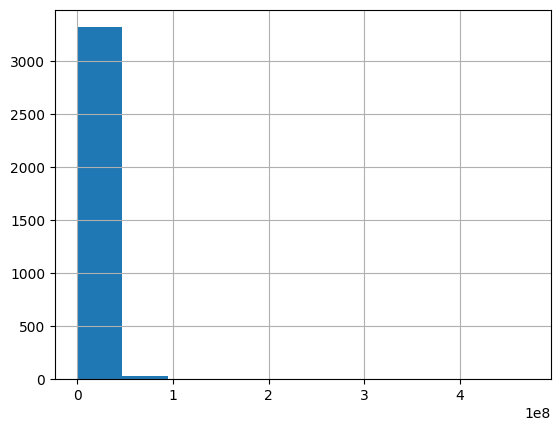

In [56]:
df["SiteEnergyUseWN(kBtu)"].hist()
rangeVector(df["SiteEnergyUseWN(kBtu)"])

Il y a des bâtiments qui consomment zéro, ce qui est impossible.

In [57]:
df["SiteEnergyUseWN(kBtu)"] = np.where(df["SiteEnergyUseWN(kBtu)"] == 0, np.nan, df["SiteEnergyUseWN(kBtu)"])

#### <a id='toc2_5_1_1_'></a>[Transformation en log](#toc0_)

<AxesSubplot: >

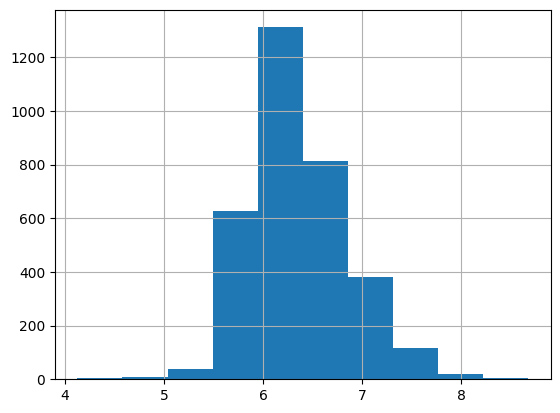

In [58]:
np.log10(df["SiteEnergyUseWN(kBtu)"]).hist()

In [59]:
#df = outliers(df, "SiteEnergyUseWN(kBtu)", task = "remove", whisker= 0.5)

### <a id='toc2_5_2_'></a>[TotalGHGEmissions](#toc0_)

(-0.8, 16870.98)

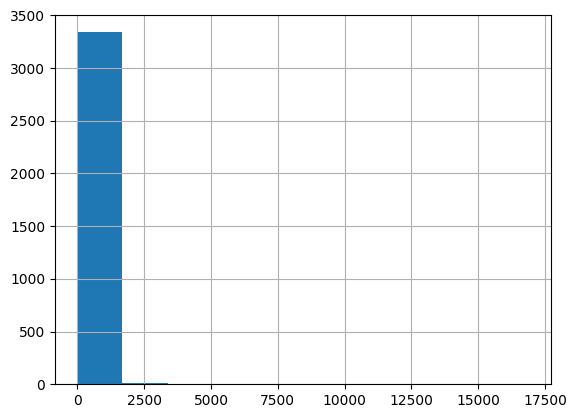

In [60]:
df["TotalGHGEmissions"].hist()
rangeVector(df["TotalGHGEmissions"])

Je ne suis pas sûr que les bâtiments à énergie positive sont présents dans le dataset, on va donc supprimer les valeurs négatives ou égales à zéro.

In [61]:
df["TotalGHGEmissions"] = np.where(df["TotalGHGEmissions"] <= 0, np.nan, df["TotalGHGEmissions"])

### <a id='toc2_5_3_'></a>[Transformation en log](#toc0_)

<AxesSubplot: >

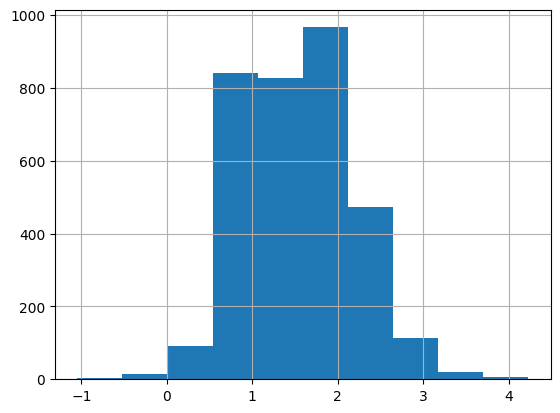

In [62]:
np.log10(df["TotalGHGEmissions"]).hist()

In [63]:
#df = outliers(df, "TotalGHGEmissions", task = "remove", whisker= 0.5)

## <a id='toc2_7_'></a>[Imputation des valeurs manquantes](#toc0_)

In [64]:
df = df.dropna(subset=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])
Ys = df.copy()[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]
X = df.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'], axis=1)

In [65]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")
tmp = pd.DataFrame(imputer.fit_transform(X))
tmp.columns = X.columns
X = tmp

### Sauvegarde de l'imputer

In [66]:
import pickle
knnImputer = open("knnImputer", "wb")
model = open("knnImputer.pickle", "wb")
pickle.dump(imputer, knnImputer)
knnImputer.close()

## <a id='toc2_8_'></a>[Nouvelles variables](#toc0_)

In [67]:
X.NumberofFloors = X.NumberofFloors + 1
X["BuildingAge"] = 2016- X.YearBuilt
X["GFATotal/floors"] = X.PropertyGFATotal / X.NumberofFloors
X["GFATotal/buildings"] = X.PropertyGFATotal / X.NumberofBuildings
numerical_columns = numerical_columns.tolist() + ["BuildingAge", "GFATotal/floors", "GFATotal/buildings"]
numerical_columns = [i for i in numerical_columns  if not i in ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]


# <a id='toc3_'></a>[Exploration des données](#toc0_)

## Histogramme des valeurs numériques

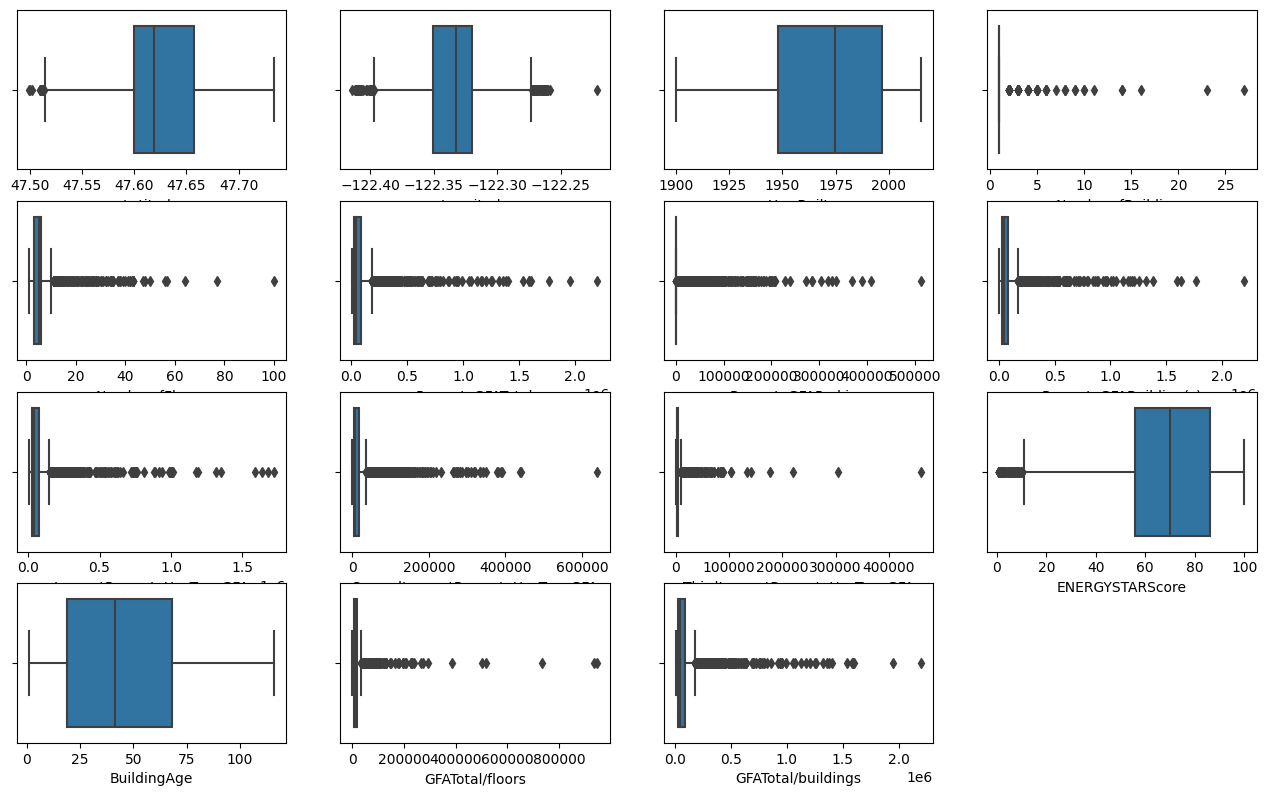

In [68]:
fig = plt.figure(figsize=(16, 12))
nums = X[numerical_columns]
for feat_idx in range(nums.shape[1]):
    ax = fig.add_subplot(int(round(nums.shape[1]/4,0)+1),4, (feat_idx+1))   
    #h = nums.iloc[:,feat_idx].hist(bins=50, color = 'steelblue', density=True, edgecolor='none')
    #ax.set_title(nums.columns[feat_idx], fontsize=5)
    sn.boxplot(x = nums.iloc[:,feat_idx])

## <a id='toc3_1_'></a>[Corrélation 2 à 2](#toc0_)

<AxesSubplot: >

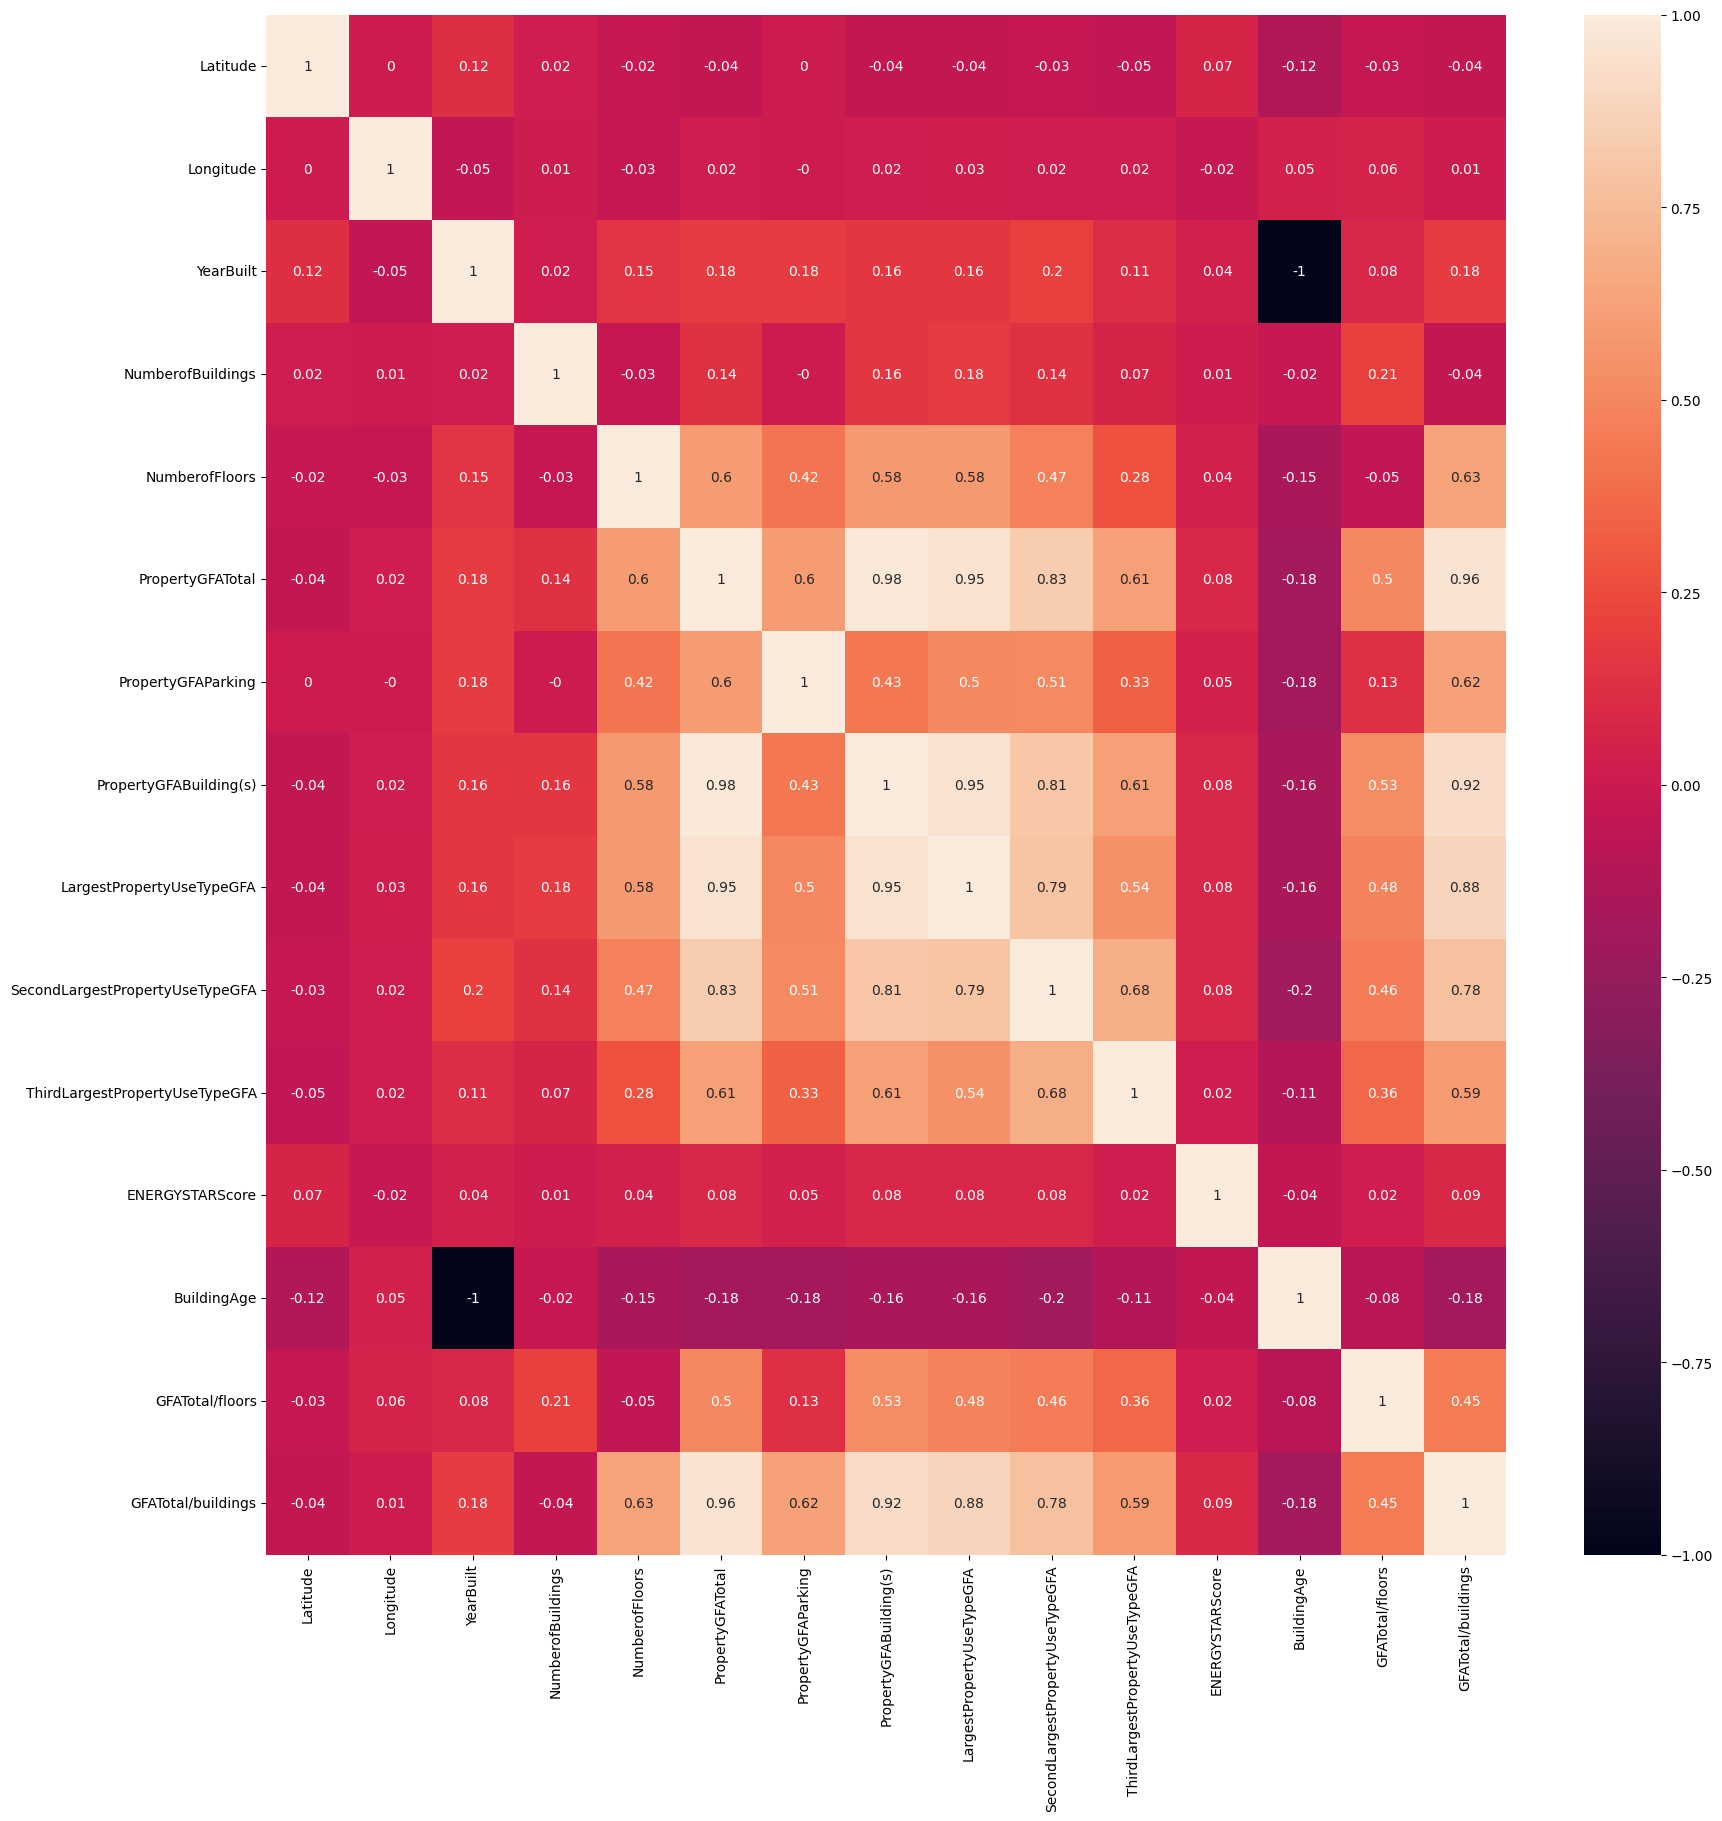

In [69]:
matrix = X.loc[:,X.columns.isin(numerical_columns)].corr().round(2)
plt.figure(figsize=(20,20))
sn.heatmap(matrix, annot=True)

In [70]:
#X.drop(['Electricity(kWh)', "NaturalGas(therms)", "SiteEUI(kBtu/sf)",	"SiteEUIWN(kBtu/sf)",	"SourceEUI(kBtu/sf)", "GHGEmissionsIntensity",	"SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "NaturalGas(kBtu)","Electricity(kBtu)", "SteamUse(kBtu)"], axis = 1, inplace=True) 

In [71]:
X.drop("YearBuilt", axis = 1, inplace=True)

In [72]:
X.shape

(3330, 38)

# <a id='toc4_'></a>[Analyses](#toc0_)

## <a id='toc4_1_'></a>[pipepline](#toc0_)

In [256]:
import sklearn
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor   
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import kernel_ridge
from sklearn import preprocessing
import shap

#####################################
##### Call a function
#####################################
import builtins
def do_call(what, *args, **kwargs):
    return getattr(builtins, what)(*args, **kwargs)

do_call('sum', range(1, 11))
#####################################
##### K-fold
#####################################
def Folds(X, y, n_splits):        
    kf  = KFold(n_splits=n_splits)
    kf.get_n_splits(X)
    XfoldsTrain = []
    XfoldsTest= []
    yfoldsTrain = []
    yfoldsTest= []
    for train_index, test_index in kf.split(X):
        XfoldsTrain.append(X[X.index.isin(train_index)])
        XfoldsTest.append(X[X.index.isin(test_index)])
        
        yfoldsTrain.append(y[y.index.isin(train_index)])
        yfoldsTest.append(y[y.index.isin(test_index)])
                
    return XfoldsTrain, XfoldsTest, yfoldsTrain, yfoldsTest

#####################################
##### K-fold
#####################################
def SFolds(X, y, n_splits):  # y need to be categorical  
    skf = StratifiedKFold(n_splits=3)
    XfoldsTrain = []
    XfoldsTest= []
    yfoldsTrain = []
    yfoldsTest= []
    
    for train_index, test_index in skf.split(X, y):
        XfoldsTrain.append(X[X.index.isin(train_index)])
        XfoldsTest.append(X[X.index.isin(test_index)])
        
        yfoldsTrain.append(y[y.index.isin(train_index)])
        yfoldsTest.append(y[y.index.isin(test_index)])

    return XfoldsTrain, XfoldsTest, yfoldsTrain, yfoldsTest

#####################################
##### Model selection, best hyperparameters, with folding
#####################################
def mlPippline(pipelines, hypergrid, X_train, y_train, X_test, y_test, cv=10, n_jobs = -1, progress = True, metric = "r2"):
    # Scale
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train = std_scale.transform(X_train)
    X_test = std_scale.transform(X_test)
    
    # Selection des meileurs hyperparametres
    fit_models = {}
    for algo, pipeline in pipelines.items():
        model = GridSearchCV(pipeline, hypergrid[algo], cv=cv, n_jobs=n_jobs, refit = True, scoring = metric)        
        try:
            model.fit(X_train, y_train)            
            fit_models[algo] = model
            if progress:            
                # Afficher les performances correspondantes
                print("Résultats de la validation croisée pour " + algo + ":")
                for mean, std, params in zip(
                        model.cv_results_['mean_test_score'], # score moyen
                        model.cv_results_['std_test_score'],  # écart-type du score
                        model.cv_results_['params']           # valeur de l'hyperparamètre
                    ):

                    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
                        "r2",
                        mean,
                        std*2,
                        params
                    ) )            
        except NotFittedError as e:
            print(repr(e))
    
    # Selection du meilleure modèle
    synthesis = []    
    #X_test = std_scale.transform(X_test)
    for algo,model in fit_models.items():        
        #yhat = model.predict(X_test)        
        #synthesis.append([r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)])
        synthesis.append(model.best_score_)
    synthesis = pd.DataFrame(synthesis)
    synthesis.index = fit_models.items()
    synthesis.columns = [metric]
    
    return fit_models, synthesis, std_scale

#####################################
##### ML
#####################################
def ML(pipelines, hypergrid, X,y, test_size=0.20, random_state=1234, cv=10, n_jobs = -1, progress = True, yTrasnfrom = "log"):
    #split    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state) 
    
    if "log" in yTrasnfrom:
        y_train = np.log10(1+y_train)
        y_test = np.log10(1+y_test)
        
    # test models
    result, synthesis, std_scale = mlPippline(pipelines, hypergrid, X_train, y_train, X_test, y_test, cv=10, n_jobs = -1, progress = progress)
    
    return result, synthesis , std_scale, X_train, y_train, X_test, y_test

#####################################
##### Test baseline model
#####################################
def baselineModel(X_train, y_train, X_test, y_test, strategy = "mean"):
    baseline = DummyRegressor(strategy= strategy)
    baseline.fit(X_train, y_train)
    print(baseline.score(X_test, y_test))    
    return baseline

#####################################
##### Plot model predictions versus real data
#####################################
def predictionVdata(m, X_test, y_test):
       predictions = m.predict(X_test)
       plt.scatter( y_test, predictions)
       plt.xlabel("model predictions")
       plt.ylabel("original values")
       plt.show()

#####################################
##### Features importance
#####################################
def modelDiagnostic(m, X_test, threshold):
    UslessVariables =  X_test.columns[np.where(m.best_estimator_.feature_importances_ == 0)]
    UsfullVariables =  X_test.columns[np.where(m.best_estimator_.feature_importances_ > 0)]

    mdi_importances = pd.Series(
    m.best_estimator_.feature_importances_, index=X_test.columns
    ).sort_values(ascending=False)
    mdi_importances[mdi_importances > threshold ].plot.bar()
    return mdi_importances, UslessVariables, UsfullVariables

#####################################
##### Model Visualization
#####################################

def modelVisualization(m, X_test, Y_test, select = range(20)):
    if str(m.estimator) == "GradientBoostingRegressor()" or str(m.estimator) == "RandomForestRegressor()":
        explainer = shap.TreeExplainer(m.best_estimator_)
        
        #P1
        import warnings
        expected_value = explainer.expected_value
        if isinstance(expected_value, list):
            expected_value = expected_value
        print(f"Explainer expected value: {expected_value}")
        
        features = X_test.iloc[select]
        features_display = X_test.loc[features.index]
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            shap_values = explainer.shap_values(features)[1]
            shap_interaction_values = explainer.shap_interaction_values(features)
        if isinstance(shap_interaction_values, list):
            shap_interaction_values = shap_interaction_values[1]
        shap.decision_plot(expected_value, shap_values, features_display)
        
        #P2
        mdi_importances = pd.Series(
        m.best_estimator_.feature_importances_, index=X_test.columns
        ).sort_values(ascending=True)
        ax = mdi_importances.plot.barh()
        ax.set_title("Random Forest Feature Importances (MDI)")
        ax.figure.tight_layout()
        
        ## P3
        #shap_values = explainer.shap_values(X_test)
        #shap.initjs()
        #shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=X_train.columns)
        

Etant donnée le problème demandant la prédiction d'une variable continue on utilisera que les méthodes de regression.

## <a id='toc4_2_'></a>[Modèles](#toc0_)

In [257]:
pipelines = {
    'rf':RandomForestRegressor(),
    'gb':GradientBoostingRegressor(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'enet':ElasticNet(),
    'kernelRidge':  kernel_ridge.KernelRidge()
}
hypergrid = {
    'rf': {
        'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
        'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    },
    'gb':{
        "learning_rate" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99], # Vitesse de correction de l'érreur 
        'n_estimators' : [10,50,100,300,500] # #nombre d'arbres de décision
    },
    'ridge':{
        'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] # Poids de correction de l'érreur 
    },
    'lasso':{
        'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] # Poids de correction de l'érreur 
    },
    'enet':{
        'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]# Poids de correction de l'érreur 
    },
    'kernelRidge':{
        'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99], # Poids de correction de l'érreur 
        'kernel':['rbf'],# Noyau utilisé
    }
}

## <a id='toc4_3_'></a>[Y1](#toc0_)

### <a id='toc4_3_1_'></a>[Sans log](#toc0_)

In [258]:
y = Ys.iloc[:,0]
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X, y, test_size=0.20, random_state=1234, # Pour des raisons de temps d'execution le test_size à été réduit augmenter à 80% à 20% il faut une environ heure d'éxécution pour des résultats proche de 80%
       cv=10, n_jobs = -1,progress = False, yTrasnfrom= "no")
synthesis

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+15, tolerance: 6.958e+13


r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.444520
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.388952
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-...  0.300412
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-...  0.298996
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j...  0.447439
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_...  0.414125

0.6453882518891303


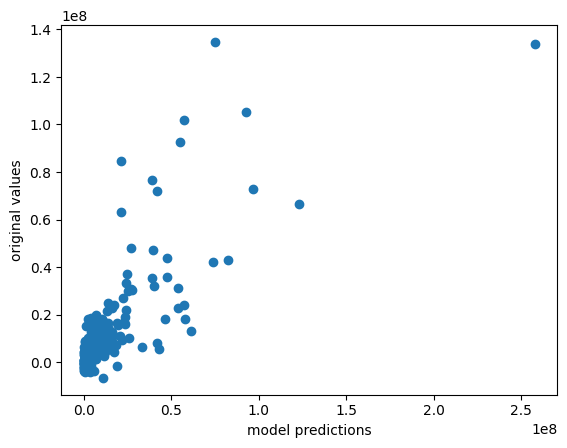

In [259]:
m = models["ridge"]
m.fit(X_train, y_train)
print(m.score(X_test, y_test))
predictionVdata(m, X_test, y_test)

In [260]:
baselineModel(X_train, y_train, X_test, y_test, strategy = "mean")

-0.0030872930103313934


DummyRegressor()

### <a id='toc4_3_2_'></a>[Avec log](#toc0_)

In [261]:
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X, y, test_size=0.20, random_state=1234, cv=10, n_jobs = -1, progress = False)
synthesis

r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.729545
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.745153
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-...  0.532539
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-...  0.544052
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j...  0.545083
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_... -1.025041

0.7993661729910428


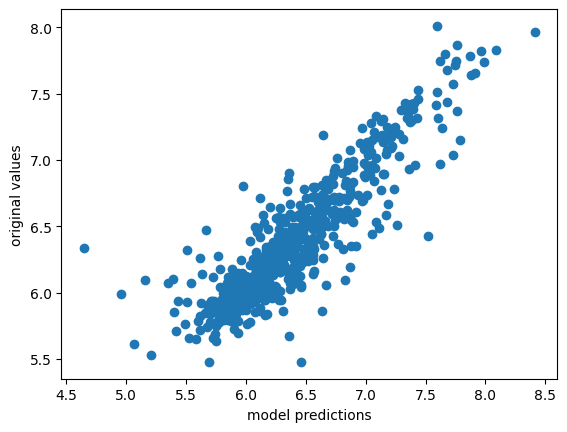

In [262]:
m = models["gb"]
m.fit(X_train, y_train)
print(m.score(X_test, y_test))
predictionVdata(m, X_test, y_test)

In [263]:
baselineModel(X_train, y_train, X_test, y_test, strategy = "mean")

-0.0013860405405456966


DummyRegressor()

### <a id='toc4_3_3_'></a>[Visualisation du modèle](#toc0_)

Explainer expected value: [6.35170943]


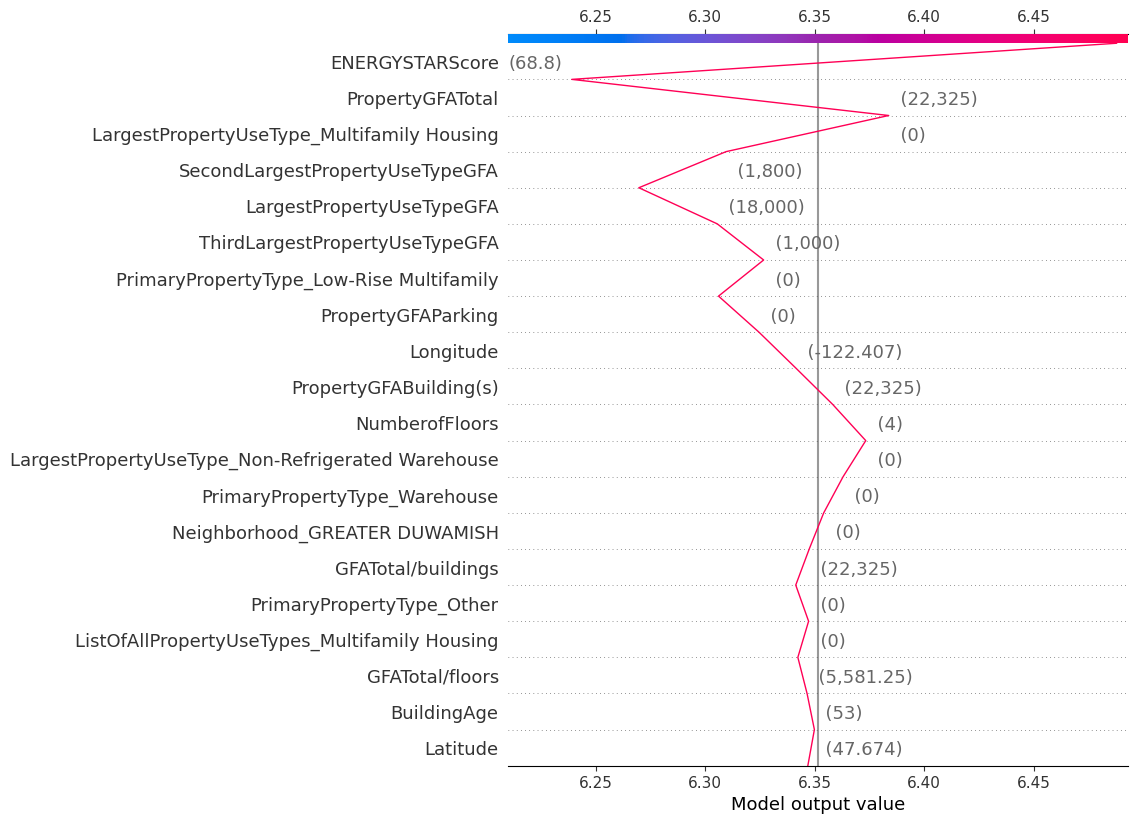

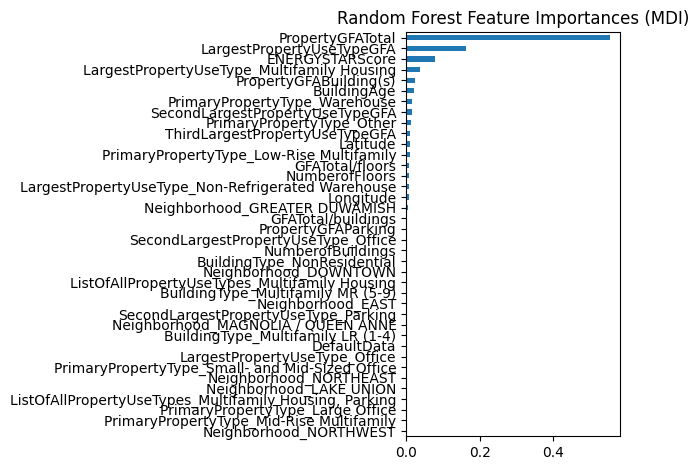

In [264]:
modelVisualization(m, X_test, y_test)

### <a id='toc4_3_4_'></a>[Avec log sans Energy score](#toc0_)

In [265]:
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X.drop("ENERGYSTARScore", axis = 1), y, test_size=0.20, random_state=1234, # Pour des raisons de temps d'execution le test_size à été réduit augmenter à 80% à 20% il faut une environ heure d'éxécution pour des résultats proche de 80%
       cv=10, n_jobs = -1, progress = False)
synthesis

r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.686174
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.695117
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-...  0.488629
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-...  0.499102
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j...  0.500387
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_... -1.095605

On perd un peut plus de 5% d'explication de la variance sans l'ENERGYSTARScore. On peut donc envisager de le laisser tomber.

### <a id='toc4_3_5_'></a>[Sauvegarde due modèle](#toc0_)

In [266]:
import pickle
m = models["gb"]
model = open("model.pickle", "wb")
pickle.dump(m, model)
model.close()
scale = open("scale.pickle", "wb")
pickle.dump(std_scale, scale)
scale.close()

## <a id='toc4_4_'></a>[Y2](#toc0_)
### <a id='toc4_4_1_'></a>[Sans log](#toc0_)

In [267]:
y = Ys.iloc[:,1]
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X, y, test_size=0.20, random_state=1234, cv=10, n_jobs = -1, progress = False, yTrasnfrom="no")
synthesis

r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.038077
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.055981
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-... -0.553232
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-... -0.532332
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j... -0.076659
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_...  0.365593

0.4226133508633916


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.525e+05, tolerance: 7.255e+04


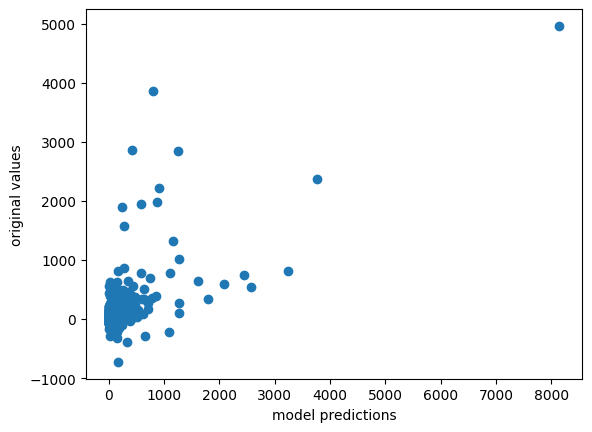

In [268]:
m1 = models["lasso"]
m1.fit(X_train, y_train)
print(m1.score(X_test, y_test))
predictionVdata(m1, X_test, y_test)

### <a id='toc4_4_2_'></a>[Avec log](#toc0_)

In [269]:
y = Ys.iloc[:,1]
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X, y, test_size=0.20, random_state=1234, cv=10, n_jobs = -1, progress = False)
synthesis

r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.584684
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.600928
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-...  0.412131
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-...  0.418047
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j...  0.418860
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_...  0.406369

0.6484391698312388


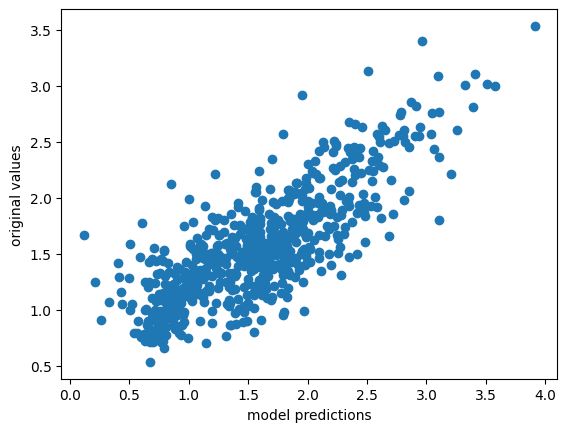

In [270]:
m1 = models["gb"]
m1.fit(X_train, y_train)
print(m1.score(X_test, y_test))
predictionVdata(m1, X_test, y_test)

### <a id='toc4_4_3_'></a>[Avec log sans Energy score](#toc0_)

In [271]:
y = Ys.iloc[:,1]
models, synthesis , std_scale, X_train, y_train, X_test, y_test= ML(pipelines, hypergrid, X.drop("ENERGYSTARScore", axis = 1), y, test_size=0.20, random_state=1234, cv=10, n_jobs = -1, progress = False)
synthesis

r2
rf          GridSearchCV(cv=10, estimator=RandomForestRegre...  0.559897
gb          GridSearchCV(cv=10, estimator=GradientBoostingR...  0.575852
ridge       GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-...  0.388298
lasso       GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-...  0.395335
enet        GridSearchCV(cv=10, estimator=ElasticNet(), n_j...  0.395629
kernelRidge GridSearchCV(cv=10, estimator=KernelRidge(), n_...  0.372874

0.6252553026669159


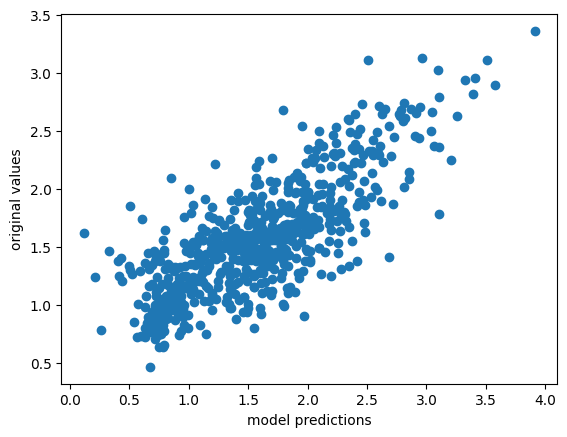

In [272]:
m1 = models["gb"]
m1.fit(X_train, y_train)
print(m1.score(X_test, y_test))
predictionVdata(m1, X_test, y_test)

Perte de 2% d'explication de la variance

### <a id='toc4_4_4_'></a>[Visualisation du modèle](#toc0_)

Explainer expected value: [1.54811155]


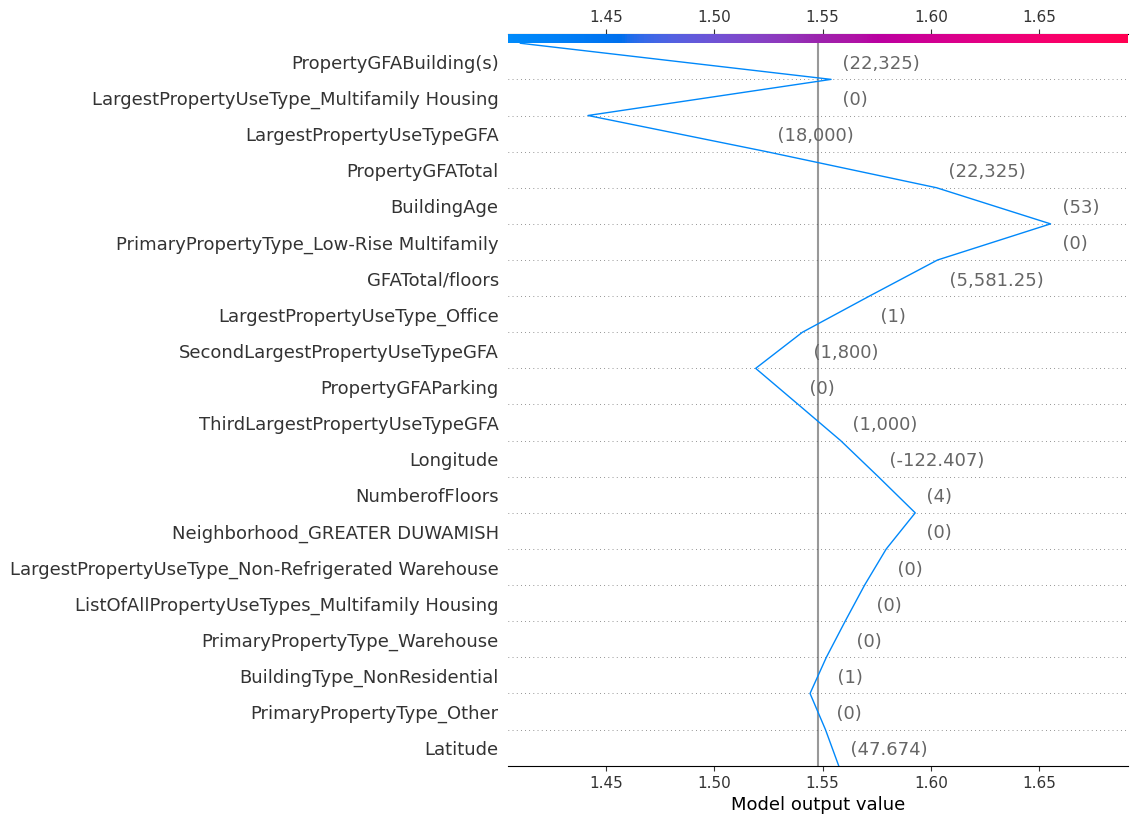

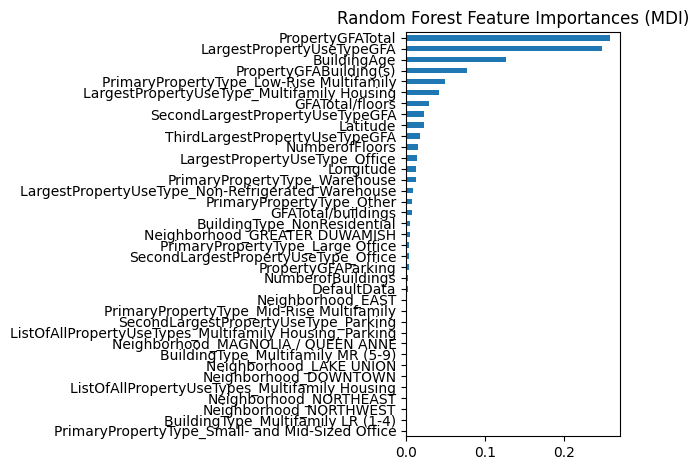

In [273]:
modelVisualization(m1, X_test, y_test)

### <a id='toc4_4_5_'></a>[Comparaison avec un modèle de base](#toc0_)

In [274]:
baselineModel(X_train, y_train, X_test, y_test, strategy = "mean")

-0.00037809647829911697


DummyRegressor()

### <a id='toc4_4_6_'></a>[Sauvegarde du modèle](#toc0_)

In [275]:
import pickle
model = open("model1.pickle", "wb")
pickle.dump(m1, model)
model.close()
scale = open("scale1.pickle", "wb")
pickle.dump(std_scale, scale)
scale.close()

# <a id='toc5_'></a>[Plot non disponible dans la fonction](#toc0_)

In [276]:
# P3
explainer = shap.TreeExplainer(m.best_estimator_)
shap_values = explainer.shap_values(y_test)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, y_test, feature_names=X_train.columns)

In [277]:
explainer = shap.TreeExplainer(m.best_estimator_)
shap_values = explainer.shap_values(X_train)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train, feature_names=X_train.columns)

# <a id='toc6_'></a>[Fonction pour le réutiliser le modèle](#toc0_)

In [278]:
from sklearn.impute import KNNImputer
import sklearn
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor   
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import kernel_ridge
from sklearn import preprocessing
import shap

def get_dummies_withThershold (df, column, thershold = 0.05):
    if df[column].dtype == "O": # If column is of object type
        series = catFr(df, column) # compute categories frequencies
        series = series[series > thershold].index # find categories frequencies greater than the thershold
        if(len(series) > 0):
            if len(series) == 1:
                print(" In " + column + "Only one categorie")
                return "NA"
            else:  
                df[column] = np.where(~df[column].isin(series.tolist()), "NA",df[column] ) # replace lower categories by NA
                tmp = pd.get_dummies(df[column]) # get dummies
                if "NA" in tmp.columns:
                    tmp.drop("NA", axis = 1, inplace=True) # drop NA
                tmp.columns = column + "_" + tmp.columns
                return tmp # return dummies  
        else:
            print(" In " + column + "all categories are bellow the thershold")
            return "NA"
    else:
        print(column + " in df is not an object type" )
    
def OHEfr_single(df, column, thershold = 0.05):
    """_summary_ 
        Remove a pandas column categories based on a given thershold
    Args:
        df (_type_): a panda data frame
        column (_type_): column name to work on
        thershold (float, optional): _description_. Defaults to 0.05.

    Returns:
        _type_: list of categories that are greateter than the thershold
    """
    if df[column].dtype == "O": # If column is of object type
        tmp = get_dummies_withThershold(df, column, thershold =thershold) # get dummies based on frequencies
        if "NA" in tmp:# If all categories are bellow the thershold return df without the column in question
            df.drop(column, axis = 1, inplace= True)
            return df 
        else:
            tmp = pd.concat([df, tmp], axis= 1) # merge with df
            tmp.drop(column, axis = 1, inplace= True) # drop columns on which dummies based on frequencies have been made
            return tmp
    else:
        return df #  # If column is not of object type return original data frame (to allow iteration on data frame)
        
def OHEfr(df, thershold = 0.05):
    for columns in df:
        df = OHEfr_single(df, columns, thershold= thershold)
    return df

def main(X, y, test_size=0.20, m1 = False, thershold = 0.05):
    # load model and scale
    if m1 == True:
        input1 = open("model1.pickle", "rb")
        m = pickle.load(input1)
        input1.close()
        input1 = open("scale1.pickle", "rb")
        scale = pickle.load(input1)
        input1.close()
    else:
        input1 = open("model.pickle", "rb")
        m = pickle.load(input1)
        input1.close()
        input1 = open("scale.pickle", "rb")
        scale = pickle.load(input1)
        input1.close()
    
    # Load KNN
    input1 = open("knnIlputer.pickle", "rb")
    imputer = pickle.load(input1)
    input1.close()
    
    # OHE
    X = OHEfr(X, thershold)
    
    #split    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size) 
    
    # KNN
    col =  X_train.columns
    X_train = pd.DataFrame(imputer.fit_transform(X_train))
    X_train.columns =  col
    
    # Log    
    y_train = np.log10(1+y_train)
    y_test = np.log10(1+y_test)
    
    # Scale
    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)

    
    print(m.score(X_test, y_test))
    
    modelVisualization(m, X_test, y_test)
    